In [76]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
vehicle = pd.read_csv('vehicle_4_mean.csv')
vehicle.head()

,Vehicle,Type,Compactness,Circularity,Distance Circularity,Radius Ratio,Axis Asppect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,Axis Rectangularity,Max Length rectangularity,Scaled Variance along major axis,Scaled variance along minor axis,Scaled radius of gyration,Skewness about major axis,Skewness about minor axis,Kurtosis about minor axis,Kurtosis about major axis,Hollows Ratio
0,van,1,93.506057,48.000000,83.0,178.0,72.0,10.0,168.69852,42.000000,20.000000,159.0,176.0,379.000000,174.903096,70.0,6.410498,16.0,187.000000,197.000000
1,van,1,91.000000,41.000000,84.0,141.0,57.0,9.0,149.00000,45.000000,19.000000,143.0,170.0,441.831763,158.000000,72.0,9.000000,14.0,189.000000,195.539704
2,saab,2,104.000000,44.799462,106.0,209.0,66.0,10.0,207.00000,32.000000,23.000000,158.0,223.0,635.000000,220.000000,73.0,6.410498,9.0,188.000000,196.000000
3,van,1,93.000000,41.000000,82.0,159.0,63.0,9.0,144.00000,40.916555,20.605653,143.0,160.0,309.000000,127.000000,63.0,6.000000,10.0,188.890983,207.000000
4,bus,3,85.000000,44.000000,70.0,205.0,103.0,52.0,149.00000,45.000000,19.000000,144.0,241.0,325.000000,188.000000,127.0,9.000000,11.0,188.890983,183.000000


In [77]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Compactness', 'Circularity', 'Distance Circularity', 'Radius Ratio','Axis Asppect Ratio','Max Length Aspect Ratio','Scatter Ratio','Elongatedness','Axis Rectangularity','Max Length rectangularity','Scaled Variance along major axis','Scaled variance along minor axis','Scaled radius of gyration','Skewness about major axis','Skewness about minor axis','Kurtosis about minor axis','Kurtosis about major axis','Hollows Ratio']
X = vehicle[feature_names]
y = vehicle['Type']

In [78]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Detect Multicollinearity using VIF-
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a pandas Series to get labeled VIF for each attribute-
vif_info = pd.Series(vif, index=X.columns)

print("\nVIF calculated for each attribute in dataset are:\n{0}\n".format(vif_info.sort_values(ascending = True)))


VIF calculated for each attribute in dataset are:
Skewness about minor axis              3.133272
Kurtosis about minor axis              4.016635
Max Length Aspect Ratio               10.283523
Scaled variance along minor axis      62.533785
Scaled radius of gyration            140.775040
Radius Ratio                         159.534310
Distance Circularity                 173.851057
Elongatedness                        186.660813
Axis Asppect Ratio                   218.600274
Skewness about major axis            221.791036
Scatter Ratio                        272.336450
Scaled Variance along major axis     275.039056
Compactness                          288.131534
Circularity                          344.998855
Axis Rectangularity                  495.719374
Max Length rectangularity            529.219460
Kurtosis about major axis           3316.626744
Hollows Ratio                       3498.326083
dtype: float64



In [79]:
#VIF
# Eliminating features having VIF greater than 5

Xdata = vehicle.drop(['Vehicle','Type','Hollows Ratio','Kurtosis about major axis','Max Length rectangularity','Axis Rectangularity','Scaled Variance along major axis','Circularity','Compactness','Scatter Ratio','Axis Asppect Ratio','Skewness about major axis'], axis=1)

feature_names=['Distance Circularity','Radius Ratio','Max Length Aspect Ratio','Elongatedness','Scaled variance along minor axis','Scaled radius of gyration','Skewness about minor axis','Kurtosis about minor axis']
X = Xdata[feature_names]
y = vehicle['Type']

Xdata.head()

,Distance Circularity,Radius Ratio,Max Length Aspect Ratio,Elongatedness,Scaled variance along minor axis,Scaled radius of gyration,Skewness about minor axis,Kurtosis about minor axis
0,83.0,178.0,10.0,42.000000,379.000000,174.903096,6.410498,16.0
1,84.0,141.0,9.0,45.000000,441.831763,158.000000,9.000000,14.0
2,106.0,209.0,10.0,32.000000,635.000000,220.000000,6.410498,9.0
3,82.0,159.0,9.0,40.916555,309.000000,127.000000,6.000000,10.0
4,70.0,205.0,52.0,45.000000,325.000000,188.000000,9.000000,11.0


In [80]:
#VIF
# Eliminating features having VIF greater than 5

Xdata = vehicle.drop(['Distance Circularity','Vehicle','Type','Hollows Ratio','Kurtosis about major axis','Max Length rectangularity','Axis Rectangularity','Scaled Variance along major axis','Circularity','Compactness','Scatter Ratio','Axis Asppect Ratio','Skewness about major axis','Scaled radius of gyration'], axis=1)

feature_names=['Radius Ratio','Max Length Aspect Ratio','Elongatedness','Scaled variance along minor axis','Skewness about minor axis','Kurtosis about minor axis']
X = Xdata[feature_names]
y = vehicle['Type']

Xdata.head()

,Radius Ratio,Max Length Aspect Ratio,Elongatedness,Scaled variance along minor axis,Skewness about minor axis,Kurtosis about minor axis
0,178.0,10.0,42.000000,379.000000,6.410498,16.0
1,141.0,9.0,45.000000,441.831763,9.000000,14.0
2,209.0,10.0,32.000000,635.000000,6.410498,9.0
3,159.0,9.0,40.916555,309.000000,6.000000,10.0
4,205.0,52.0,45.000000,325.000000,9.000000,11.0


In [81]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Detect Multicollinearity using VIF-
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a pandas Series to get labeled VIF for each attribute-
vif_info = pd.Series(vif, index=X.columns)

print("\nVIF calculated for each attribute in dataset are:\n{0}\n".format(vif_info.sort_values(ascending = True)))


VIF calculated for each attribute in dataset are:
Skewness about minor axis            2.885208
Kurtosis about minor axis            3.310630
Max Length Aspect Ratio              5.533837
Elongatedness                       12.311542
Scaled variance along minor axis    17.957350
Radius Ratio                        49.579522
dtype: float64



In [82]:
#VIF
# Eliminating features having VIF greater than 5

Xdata = vehicle.drop(['Scaled radius of gyration','Radius Ratio','Distance Circularity','Vehicle','Type','Hollows Ratio','Kurtosis about major axis','Max Length rectangularity','Axis Rectangularity','Scaled Variance along major axis','Circularity','Compactness','Scatter Ratio','Axis Asppect Ratio','Skewness about major axis','Scaled variance along minor axis'], axis=1)

feature_names=['Max Length Aspect Ratio','Elongatedness','Skewness about minor axis','Kurtosis about minor axis']
X = Xdata[feature_names]
y = vehicle['Type']

Xdata.head()

,Max Length Aspect Ratio,Elongatedness,Skewness about minor axis,Kurtosis about minor axis
0,10.0,42.000000,6.410498,16.0
1,9.0,45.000000,9.000000,14.0
2,10.0,32.000000,6.410498,9.0
3,9.0,40.916555,6.000000,10.0
4,52.0,45.000000,9.000000,11.0


In [83]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Detect Multicollinearity using VIF-
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a pandas Series to get labeled VIF for each attribute-
vif_info = pd.Series(vif, index=X.columns)

print("\nVIF calculated for each attribute in dataset are:\n{0}\n".format(vif_info.sort_values(ascending = True)))


VIF calculated for each attribute in dataset are:
Skewness about minor axis    2.718001
Kurtosis about minor axis    2.843394
Max Length Aspect Ratio      3.907617
Elongatedness                5.995473
dtype: float64



In [84]:
#VIF
# Eliminating features having VIF greater than 5

Xdata = vehicle.drop(['Scaled variance along minor axis','Radius Ratio','Elongatedness','Distance Circularity','Vehicle','Type','Hollows Ratio','Kurtosis about major axis','Max Length rectangularity','Axis Rectangularity','Scaled Variance along major axis','Circularity','Compactness','Scatter Ratio','Axis Asppect Ratio','Skewness about major axis','Scaled radius of gyration'], axis=1)

feature_names=['Max Length Aspect Ratio','Skewness about minor axis','Kurtosis about minor axis']
X = Xdata[feature_names]
y = vehicle['Type']

Xdata.head()

,Max Length Aspect Ratio,Skewness about minor axis,Kurtosis about minor axis
0,10.0,6.410498,16.0
1,9.0,9.000000,14.0
2,10.0,6.410498,9.0
3,9.0,6.000000,10.0
4,52.0,9.000000,11.0


In [85]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Detect Multicollinearity using VIF-
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a pandas Series to get labeled VIF for each attribute-
vif_info = pd.Series(vif, index=X.columns)

print("\nVIF calculated for each attribute in dataset are:\n{0}\n".format(vif_info.sort_values(ascending = True)))


VIF calculated for each attribute in dataset are:
Skewness about minor axis    2.190189
Kurtosis about minor axis    2.335274
Max Length Aspect Ratio      2.809556
dtype: float64



In [86]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.37821971e-01 -2.95813751e-01 -9.09780635e-01]
 [ 8.06042378e+00 -1.34047581e+00  2.87267029e-01]
 [ 4.62049669e-01  1.79351037e+00  6.46381328e-01]
 ...
 [-3.37779185e-01  1.79351037e+00  1.78002148e-03]
 [ 2.62092456e-01 -9.22610988e-01 -7.90075868e-01]
 [-3.37779185e-01 -1.11500497e-03  7.66086094e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.44
Accuracy of Logistic regression classifier on test set: 0.36
              precision    recall  f1-score   support

           1       0.21      0.25      0.23        32
           2       0.39      0.29      0.33        52
           3       0.42      0.80      0.55        35
           4       0.38      0.19      0.25        47

    accuracy                           0.36       166
   macro avg       0.35      0.38      0.34       166
weighted avg       0.36      0.36      0.34       166

[[ 8  6 15  3]
 [12 15 15 10]
 [ 3  2 28  2]
 [15 15  8  9]]


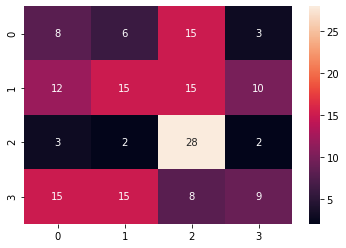

In [87]:
#LR
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

In [88]:
#ANN

Accuracy of LDA classifier on training set: 0.40
Accuracy of LDA classifier on test set: 0.34
              precision    recall  f1-score   support

           1       0.27      0.22      0.24        32
           2       0.40      0.31      0.35        52
           3       0.35      0.77      0.48        35
           4       0.30      0.15      0.20        47

    accuracy                           0.34       166
   macro avg       0.33      0.36      0.32       166
weighted avg       0.34      0.34      0.31       166

[[ 7  6 15  4]
 [ 9 16 17 10]
 [ 3  3 27  2]
 [ 7 15 18  7]]


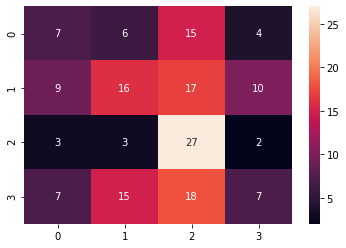

In [89]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of QDA classifier on training set: 0.40
Accuracy of QDA classifier on test set: 0.34
              precision    recall  f1-score   support

           1       0.25      0.06      0.10        32
           2       0.35      0.15      0.21        52
           3       0.39      0.69      0.49        35
           4       0.30      0.47      0.37        47

    accuracy                           0.34       166
   macro avg       0.32      0.34      0.29       166
weighted avg       0.32      0.34      0.29       166

[[ 2  1 13 16]
 [ 2  8 13 29]
 [ 3  2 24  6]
 [ 1 12 12 22]]


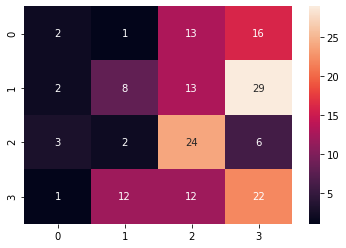

In [90]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of SVM classifier on training set: 0.51
Accuracy of SVM classifier on test set: 0.36
              precision    recall  f1-score   support

           1       0.25      0.06      0.10        32
           2       0.35      0.15      0.21        52
           3       0.39      0.69      0.49        35
           4       0.30      0.47      0.37        47

    accuracy                           0.34       166
   macro avg       0.32      0.34      0.29       166
weighted avg       0.32      0.34      0.29       166

[[ 2  1 13 16]
 [ 2  8 13 29]
 [ 3  2 24  6]
 [ 1 12 12 22]]


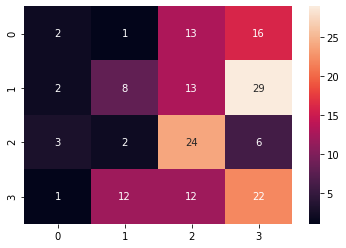

In [91]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

[Text(180.7125274309336, 212.004, 'X[0] <= 7.5\nentropy = 0.75\nsamples = 826\nvalue = [194, 209, 214, 209]'),
 Text(97.2672198217202, 201.132, 'X[1] <= 11.5\nentropy = 0.649\nsamples = 331\nvalue = [51, 55, 174, 51]'),
 Text(72.6067314235166, 190.26, 'X[2] <= 23.5\nentropy = 0.605\nsamples = 292\nvalue = [43, 44, 169, 36]'),
 Text(41.87562942297224, 179.388, 'X[0] <= 3.5\nentropy = 0.577\nsamples = 266\nvalue = [43, 31, 162, 30]'),
 Text(26.8026810016331, 168.516, 'X[1] <= 4.5\nentropy = 0.375\nsamples = 4\nvalue = [3, 0, 0, 1]'),
 Text(26.073666303756127, 157.644, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(27.531695699510074, 157.644, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(56.94857784431138, 168.516, 'X[1] <= 6.205\nentropy = 0.568\nsamples = 262\nvalue = [40, 31, 162, 29]'),
 Text(28.98972509526402, 157.644, 'X[1] <= 1.5\nentropy = 0.499\nsamples = 155\nvalue = [17, 16, 106, 16]'),
 Text(11.926224823081112, 146.772, 'X[2] <= 1.5\nentropy = 0.598\n

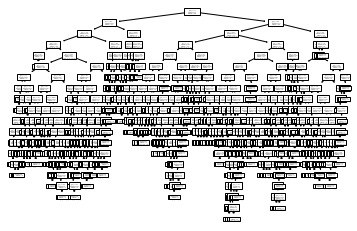

In [92]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf.fit(X,y))

Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on test set: 0.36
              precision    recall  f1-score   support

           1       0.25      0.31      0.28        32
           2       0.25      0.15      0.19        52
           3       0.45      0.54      0.49        35
           4       0.44      0.49      0.46        47

    accuracy                           0.36       166
   macro avg       0.35      0.37      0.36       166
weighted avg       0.35      0.36      0.35       166

[[10  7  5 10]
 [13  8 13 18]
 [ 6  9 19  1]
 [11  8  5 23]]


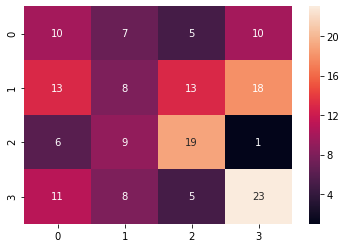

In [93]:
#Tree Based
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of GNB classifier on training set: 0.37
Accuracy of GNB classifier on test set: 0.34
              precision    recall  f1-score   support

           1       0.29      0.06      0.10        32
           2       0.40      0.19      0.26        52
           3       0.38      0.69      0.48        35
           4       0.30      0.45      0.36        47

    accuracy                           0.34       166
   macro avg       0.34      0.35      0.30       166
weighted avg       0.34      0.34      0.31       166

[[ 2  1 12 17]
 [ 1 10 15 26]
 [ 3  2 24  6]
 [ 1 12 13 21]]


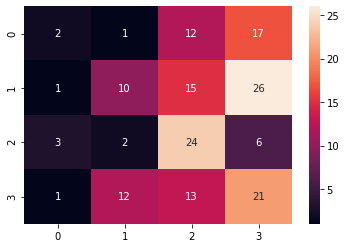

In [94]:
#Bays Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.35
              precision    recall  f1-score   support

           1       0.16      0.28      0.20        32
           2       0.39      0.21      0.28        52
           3       0.49      0.60      0.54        35
           4       0.45      0.36      0.40        47

    accuracy                           0.35       166
   macro avg       0.37      0.36      0.35       166
weighted avg       0.38      0.35      0.35       166

[[ 9  8  8  7]
 [18 11 11 12]
 [10  2 21  2]
 [20  7  3 17]]


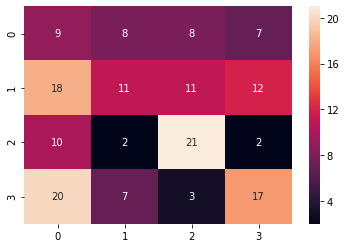

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Bagging classifier on training set: 0.95
Accuracy of Bagging classifier on test set: 0.33
              precision    recall  f1-score   support

           1       0.21      0.28      0.24        32
           2       0.30      0.19      0.24        52
           3       0.43      0.51      0.47        35
           4       0.37      0.38      0.37        47

    accuracy                           0.33       166
   macro avg       0.33      0.34      0.33       166
weighted avg       0.33      0.33      0.33       166

[[ 9  6  7 10]
 [12 10 13 17]
 [ 7  6 18  4]
 [14 11  4 18]]


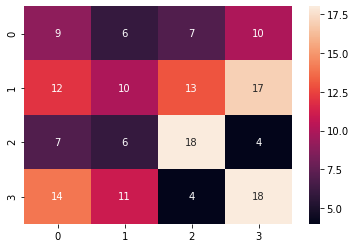

In [96]:
#################################### Bagging ######################################
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import csv

seed = 7
cart = DecisionTreeClassifier()
num_trees = 200
bg = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

bg.fit(X_train, y_train)
print('Accuracy of Bagging classifier on training set: {:.2f}'
     .format(bg.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.2f}'
     .format(bg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = bg.predict(X_test)
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Random Forest classifier on training set: 0.95
Accuracy of Random Forest classifier on test set: 0.30
              precision    recall  f1-score   support

           1       0.18      0.22      0.20        32
           2       0.25      0.15      0.19        52
           3       0.38      0.46      0.42        35
           4       0.34      0.38      0.36        47

    accuracy                           0.30       166
   macro avg       0.29      0.30      0.29       166
weighted avg       0.29      0.30      0.29       166

[[ 7  6  7 12]
 [12  8 14 18]
 [ 7  7 16  5]
 [13 11  5 18]]


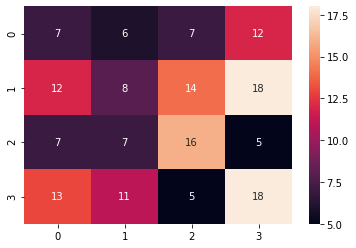

In [97]:
###################################### Random Forest code ##############################
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("vehicle_4_mean.csv")

Y = data.Type
X = data.drop(['Vehicle','Type'], axis=1)

seed = 7
num_trees = 100
max_features = 2

rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

Accuracy of Adaboost classifier on training set: 0.45
Accuracy of Adaboost classifier on test set: 0.42
              precision    recall  f1-score   support

           1       0.33      0.28      0.31        32
           2       0.33      0.27      0.29        52
           3       0.54      0.77      0.64        35
           4       0.41      0.40      0.41        47

    accuracy                           0.42       166
   macro avg       0.40      0.43      0.41       166
weighted avg       0.40      0.42      0.40       166

[[ 9 10  5  8]
 [ 9 14 12 17]
 [ 5  1 27  2]
 [ 4 18  6 19]]


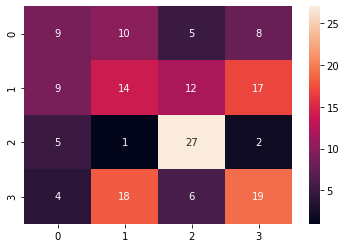

In [98]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 100
ab = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ab.fit(X_train, y_train)
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = ab.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")